# chapter 5 공산과 가산 (Odds and Addends)

## 5.1 공산

- "공산은 3대 1입니다."


- 어떤 사건의 **승산(odds in favor)**은 이 사건이 **일어나지 않을때의 확률**과 **일어났을때의 확률**의 **비율**이다.


- 예) 우리팀 승률 75% --> 3:1


- 확률이 낮은 경우, 승산보다 반대 형식의 공산으로 표기하는 경우가 더 흔하다.
- 예) 내 말이 이길 확률 10% --> 공산 9:1

-----------------------------------
>http://en.wikipedia.org/wiki/Odds

>- **odds for**  -- the likelihood that a particular event will take place. 
>- **odds against** -- the likelihood that a particular event will **not** take place. 

-------------------------


- 확률과 공산은 **동일한 정보를 다르게 표기**하는 법이다.

In [1]:
from __future__ import division

%matplotlib inline

In [2]:
def Odds(p):
    return p / (1-p)

In [3]:
def Probability(o):
    return o / (o+1)

In [4]:
# 분모, 분자 아는 경우

def Probability2(yes, no):
    return yes / (yes + no)

< 예 >

경마장에서 20%의 사람만 자기 말이 이길 거라고 생각하고, 80%의 사람들은 아닐거라고 생각한다면, 공산은 20:80 혹은 1:4

In [5]:
p=0.2
o = Odds(p)
print o

0.25


In [6]:
p1= Probability(o)
print p1

0.2


In [7]:
Probability2(20,80)  # 분모 = 80, 분자 = 20

0.2

## 5.2 베이즈 이론의 공산 형태

**확률형태** 베이즈 이론

$$p(H|D) = \frac{p(H)p(D|H)}{p(D)}$$

A, B 라는 두 개의 가설이 있을때 사후확률비

$$\frac{p(A|D)}{p(B|D)} = \frac{p(A)p(D|A)}{p(B)p(D|B)} $$

A, B 가 상호 배제적이며 전체 포괄적이라면, $p(B) = 1 - p(A)$

A 에 대한 공산을 $ o(A) $ 로 쓰면, 

> $$ o(A|D) = o(A) \frac{p(D|A)}{p(D|B)} $$

즉, **사후 공산**은 **사전공산**과 **우도비**의 곱

- 베이즈 이론을 **공산형태**로 나타낸것이다.

## 5.3 올리버의 혈액형

>< 문제 >

>범죄현장에서 두 사람의 혈흔을 발견.

>두 혈흔의 혈액형은 'O'형 (인구의 60% 빈도로 나타남) 과 'AB'형 (인구의 1%).

>용의자 올리버는 'O'형

>이 데이터(범죄 현장의 혈흔의 혈액형)가 올리버가 범인중 한명이라는 질문에 대한 증거인가?

$$ o(A|D) = o(A) \frac{p(D|A)}{p(D|B)} $$

$ o(A) $ 로 나누면, 
>$$ \frac{o(A|D)}{o(A)} =\frac{p(D|A)}{p(D|B)} $$

>왼쪽 항목 : **사후공산과 사전공산의 비**

>오른쪽 항목 : **우도비 (베이즈 요인)**

- 베이즈요인(Bayes factor) > 1

    $ \frac{p(D|A)}{p(D|B)} > 1 $

    ; 데이터는 B의 가정보다는 **A의 가정에 가깝다**

- 공산비 = ( 사후공산 / 사전공산 ) > 1

  $ \frac{o(A|D)}{o(A)} > 1 $
  
  ; 테이터 상에서 **전보다 공산이 커졌다.**

- 베이즈요인 = 1 

  ; 데이터는 각 가설에서 경우가 동일하므로 **공산은 변하지 않는다.**

>< 문제 풀이 >

>* 올리버가 범인이라면, 

>    현장 'O'형은 올리버이고, 이때 데이터 확률은 'AB'형 확률 1% 와 동일.

>     ; 1%
<br/><br/>

>* 범인 아니라면,

>    임의의 'O'형 확률 and 임의의 'AB'형 확률

>    --> 첫번째 사람이 'O'형이고, 두번째 사람이 'AB'형 
>         or 첫번째 사람이 'AB' 형이고, 두번째 사람이 'O'형

>       ; 0.6*0.01 + 0.6*0.01 = 1.2%

## 5.4 가산 

The fundamental operation of Bayesian statistics is **Update**, which takes a **prior distribution**
and a set of **data**, and produces a **posterior distribution**.

 --> 사전분포와 데이터로 사후분포를 생성!

실제 문제는 보통 정규화, **덧셈**과 **최댓값**, 최솟값, 이런 연산을 조합한 기타 수치 연산 등의 많은 연산을 포함하고 있다.

이 장(5장)에서는 덧셈과 최댓값에 대해서 설명한다.

던전 앤 드래곤 게임 예

게임시작하기 전에, 플레이어는 6면체 주사위 세개를 굴린 후 이 값을 더해서 캐릭터 속성값(체력, 지능, 등)을 생성한다.

3 주사위의 합의 분포는?

- 시뮬레이션 - 하나의 주사위에 대한 분포를 나타내는 Pmf 가 주어졌을때, 이를 사용해서 랜덤 샘플을 만들고, 더해서, 시뮬레이션으로 만들어진 값의 합에 대한 분포를 구한다.


- 나열 (enumeration) - 주어진 두 개의 Pmf를 사용하여, 모든 가능한 수의 쌍을 나열하고, 이 합의 분포를 계산한다.<br/>
    ; (첫번째 pmf + 두번째 pmf) + 세번째 pmf


In [9]:
# %load ./src/dungeons.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

import random

from src import thinkbayes
from src import thinkplot

FORMATS = ['pdf', 'eps', 'png']


class Die(thinkbayes.Pmf):
    """Represents the PMF of outcomes for a die."""

    def __init__(self, sides, name=''):
        """Initializes the die.

        sides: int number of sides
        name: string
        """
        thinkbayes.Pmf.__init__(self, name=name)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()


def PmfMax(pmf1, pmf2):
    """Computes the distribution of the max of values drawn from two Pmfs.

    pmf1, pmf2: Pmf objects

    returns: new Pmf
    """
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res
    

def main():
    pmf_dice = thinkbayes.Pmf()
    pmf_dice.Set(Die(4), 5)
    pmf_dice.Set(Die(6), 4)
    pmf_dice.Set(Die(8), 3)
    pmf_dice.Set(Die(12), 2)
    pmf_dice.Set(Die(20), 1)
    pmf_dice.Normalize()

    mix = thinkbayes.Pmf()
    for die, weight in pmf_dice.Items():
        for outcome, prob in die.Items():
            mix.Incr(outcome, weight*prob)

    mix = thinkbayes.MakeMixture(pmf_dice)

    colors = thinkplot.Brewer.Colors()
    thinkplot.Hist(mix, width=0.9, color=colors[4])
    thinkplot.Save(root='./images/dungeons3',
                xlabel='Outcome',
                ylabel='Probability',
                formats=FORMATS)

    random.seed(17)

    d6 = Die(6, 'd6')

    dice = [d6] * 3
    three = thinkbayes.SampleSum(dice, 1000)
    three.name = 'sample'
    three.Print()

    three_exact = d6 + d6 + d6
    three_exact.name = 'exact'
    three_exact.Print()

    thinkplot.PrePlot(num=2)
    thinkplot.Pmf(three)
    thinkplot.Pmf(three_exact, linestyle='dashed')
    thinkplot.Save(root='./images/dungeons1',
                xlabel='Sum of three d6',
                ylabel='Probability',
                axis=[2, 19, 0, 0.15],
                formats=FORMATS)

    thinkplot.Clf()
    thinkplot.PrePlot(num=1)
    
    # compute the distribution of the best attribute the hard way
    best_attr2 = PmfMax(three_exact, three_exact)
    best_attr4 = PmfMax(best_attr2, best_attr2)
    best_attr6 = PmfMax(best_attr4, best_attr2)
    # thinkplot.Pmf(best_attr6)

    # and the easy way
    best_attr_cdf = three_exact.Max(6)
    best_attr_cdf.name = ''
    best_attr_pmf = thinkbayes.MakePmfFromCdf(best_attr_cdf)
    best_attr_pmf.Print()

    thinkplot.Pmf(best_attr_pmf)
    thinkplot.Save(root='./images/dungeons2',
                xlabel='Sum of three d6',
                ylabel='Probability',
                axis=[2, 19, 0, 0.23],
                formats=FORMATS)
    


if __name__ == '__main__':
    main()


Writing ./images/dungeons3.pdf
Writing ./images/dungeons3.eps
Writing ./images/dungeons3.png
3 0.002
4 0.017
5 0.017
6 0.046
7 0.062
8 0.095
9 0.125
10 0.123
11 0.132
12 0.127
13 0.099
14 0.075
15 0.044
16 0.022
17 0.014
3 0.00462962962963
4 0.0138888888889
5 0.0277777777778
6 0.0462962962963
7 0.0694444444444
8 0.0972222222222
9 0.115740740741
10 0.125
11 0.125
12 0.115740740741
13 0.0972222222222
14 0.0694444444444
15 0.0462962962963
16 0.0277777777778
17 0.0138888888889
18 0.00462962962963
Writing ./images/dungeons1.pdf
Writing ./images/dungeons1.eps
Writing ./images/dungeons1.png
3 9.84640042005e-15
4 4.03210097201e-11
5 9.80606956393e-09
6 6.20323226463e-07
7 1.74701297953e-05
8 0.000285572333648
9 0.00247724167357
10 0.0128440856934
11 0.0439796447754
12 0.105590541894
13 0.18102225454
14 0.212013521417
15 0.194224527556
16 0.141452169514
17 0.0786340868805
18 0.0274582534226
Writing ./images/dungeons2.pdf
Writing ./images/dungeons2.eps
Writing ./images/dungeons2.png


In [10]:
import random
import matplotlib.pyplot as pyplot

from src import thinkbayes
from src import thinkplot


FORMATS = ['pdf', 'eps', 'png']


class Die(thinkbayes.Pmf):
    """Represents the PMF of outcomes for a die."""

    def __init__(self, sides, name=''):
        """Initializes the die.

        sides: int number of sides
        name: string
        """
        thinkbayes.Pmf.__init__(self, name=name)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()


def PmfMax(pmf1, pmf2):
    """Computes the distribution of the max of values drawn from two Pmfs.

    pmf1, pmf2: Pmf objects

    returns: new Pmf
    """
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res
    

def main():
    random.seed(17)

    d6 = Die(6, 'd6')  # 6 면체 주사위 생성, simulation, 하나의 주사위 분포 Pmf

    dice = [d6] * 3
    three = thinkbayes.SampleSum(dice, 1000)   # 주사위를 1000 번 굴린 샘플값 생성
    three.name = 'sample (simulation)'
    three.Print()

    print '---------- simulation ---- '
    
    three_exact = d6 + d6 + d6  # 나열 (enumeration)
    three_exact.name = 'exact (enumeration)'
    three_exact.Print()

    print '--------- enumeration ----- '
    
    thinkplot.PrePlot(num=2)
    
    thinkplot.Pmf(three)  # simulation
    thinkplot.Pmf(three_exact, linestyle='dashed')  # 나열 (enumeration)
    
    # thinkplot.Show()  # image view
    thinkplot.Save(root='./images/dungeons1',
                xlabel='Sum of three d6',
                ylabel='Probability',
                axis=[2, 19, 0, 0.15],
                formats=FORMATS)
    
    
if __name__ == '__main__':
    main()


3 0.002
4 0.017
5 0.017
6 0.046
7 0.062
8 0.095
9 0.125
10 0.123
11 0.132
12 0.127
13 0.099
14 0.075
15 0.044
16 0.022
17 0.014
---------- simulation ---- 
3 0.00462962962963
4 0.0138888888889
5 0.0277777777778
6 0.0462962962963
7 0.0694444444444
8 0.0972222222222
9 0.115740740741
10 0.125
11 0.125
12 0.115740740741
13 0.0972222222222
14 0.0694444444444
15 0.0462962962963
16 0.0277777777778
17 0.0138888888889
18 0.00462962962963
--------- enumeration ----- 
Writing ./images/dungeons1.pdf
Writing ./images/dungeons1.eps
Writing ./images/dungeons1.png


<img src="./images/dungeons1.png" width=600px>

## 5.5 최댓값

던전 앤 드래곤 캐릭터 만들때, 특히 캐릭터의 최고 속성이 중요하다. 따라서 속성의 **최댓값 분포**가 궁금하다.

3 가지 방법

- 시뮬레이션 (Simulation) ; sum 대신 max 사용, 앞 코드와 비슷.

- 나열 (enumeration)

- 멱법 (Exponentiation) ; Pmf 를 Cdf(누적분포함수)로 바꿀때, 최댓값에서 Cdf를 구하는 알고리즘.

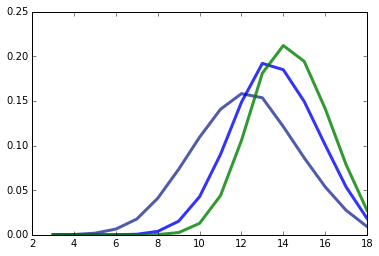

-------------------------------- 
3 9.84640042005e-15
4 4.03210097201e-11
5 9.80606956393e-09
6 6.20323226463e-07
7 1.74701297953e-05
8 0.000285572333648
9 0.00247724167357
10 0.0128440856934
11 0.0439796447754
12 0.105590541894
13 0.18102225454
14 0.212013521417
15 0.194224527556
16 0.141452169514
17 0.0786340868805
18 0.0274582534226
Writing ./images/dungeons2.pdf
Writing ./images/dungeons2.eps
Writing ./images/dungeons2.png


In [11]:
import random
import matplotlib.pyplot as pyplot

from src import thinkbayes
from src import thinkplot

FORMATS = ['pdf', 'eps', 'png']


class Die(thinkbayes.Pmf):
    """Represents the PMF of outcomes for a die."""

    def __init__(self, sides, name=''):
        """Initializes the die.

        sides: int number of sides
        name: string
        """
        thinkbayes.Pmf.__init__(self, name=name)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()


def PmfMax(pmf1, pmf2):
    """Computes the distribution of the max of values drawn from two Pmfs.

    pmf1, pmf2: Pmf objects

    returns: new Pmf
    """
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res
    

def main():
    
    random.seed(17)

    d6 = Die(6, 'd6')  # 6 면체 주사위 생성,  하나의 주사위 분포 Pmf

    three_exact = d6 + d6 + d6  # 나열 (enumeration)
    
    thinkplot.Clf()
    thinkplot.PrePlot(num=1)
    
    # compute the distribution of the best attribute the hard way
    best_attr2 = PmfMax(three_exact, three_exact)  # 세 주사위를 2번 굴렸을때의 최댓값 분포
    best_attr4 = PmfMax(best_attr2, best_attr2)  # 세 주사위를 4번 굴렸을때의 최댓값 분포
    best_attr6 = PmfMax(best_attr4, best_attr2)  # 세 주사위를 6번 굴렸을때의 최댓값 분포
    thinkplot.Pmf(best_attr2)
    thinkplot.Pmf(best_attr4)
    thinkplot.Pmf(best_attr6)
    thinkplot.Show()  # image view

    print '-------------------------------- '
    
    # and the easy way
    best_attr_cdf = three_exact.Max(6)  # 세 주사위를 6번 굴렸을때의 최댓값 분포
    best_attr_cdf.name = ''
    best_attr_pmf = thinkbayes.MakePmfFromCdf(best_attr_cdf)
    best_attr_pmf.Print()

    thinkplot.Pmf(best_attr_pmf)
    
    # thinkplot.Show()  # image view
    
    thinkplot.Save(root='./images/dungeons2',
                xlabel='Sum of three d6',
                ylabel='Probability',
                axis=[2, 19, 0, 0.23],
                formats=FORMATS)
    


if __name__ == '__main__':
    main()


 #### 그림 5-2 세 주사위를 6번 굴렸을때의 최댓값 분포
 
<img src="./images/dungeons2.png" width=600px>

### 누적분포함수 (cumulative distribution function)

$$ CDF(x) = p(X \le x) $$

여기서 $X$ 는 "이 분포에서 임의로 선택한 값"의 뜻을 갖는 랜덤 변수다.

- Pmf를 Cdf로 변경하면 동일한 계산을 훨씬 빠르게 할 수 있다!

>$CDF_1$ 에서 $X$를 고르고 $CDF_2$ 에서 $Y$를 고르고, 최댓값 $Z = max(X,Y)$ 를 계산하자!

>$X$, $Y$ 선택이 독립적이면,

>$$CDF_3(z) = CDF_1(z)CDF_2(z)$$

>이때 $CDF_3$ 의 분포는 $Z$ 의 분포다.


>< 예 > Z 가 5 이하인 경우는 얼마일까? 이 경우 X와 Y 모두 5 이하여야 한다.
>$$CDF_3(5) = CDF_1(5)CDF_2(5)$$

- 동일한 분포에서 k개의 값을 가져오는 특수한 경우는 다음과 같은 식이 성립한다.

$$CDF_k(z) = CDF_1(z)^k$$

k개의 값중 최댓값의 분포를 찾으면, 주어진 Cdf 의 확률을 나열한 후 이를 k회 곱하면 된다. (**멱법**)

## 5.6 혼합

다음과 같은 주사위 한상자가 있다. 상자에서 주사위를 골라 굴렸다. 이 때 결괏값의 분포는?

>5  4면체 주사위

>4  6면체 주사위

>3  8면체 주사위

>2  12면체 주사위

>1  20면체 주사위

- 어떤 주사위인지를 모를 경우, 결과 분포는 서로 다른 범위의 균등 분포의 혼합 형태로 나타난다.
- PMF 의 형태로 분포를 간단하게 계산할 수 있다.

In [12]:
import random
import matplotlib.pyplot as pyplot

from src import thinkbayes
from src import thinkplot

FORMATS = ['pdf', 'eps', 'png']


class Die(thinkbayes.Pmf):
    """Represents the PMF of outcomes for a die."""

    def __init__(self, sides, name=''):
        """Initializes the die.

        sides: int number of sides
        name: string
        """
        thinkbayes.Pmf.__init__(self, name=name)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()


def PmfMax(pmf1, pmf2):
    """Computes the distribution of the max of values drawn from two Pmfs.

    pmf1, pmf2: Pmf objects

    returns: new Pmf
    """
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res
    

def main():
    pmf_dice = thinkbayes.Pmf()
    pmf_dice.Set(Die(4), 5)  # 각 주사위의 확률을 알아서 가중치 부여한다.
    pmf_dice.Set(Die(6), 4)
    pmf_dice.Set(Die(8), 3)
    pmf_dice.Set(Die(12), 2)
    pmf_dice.Set(Die(20), 1)
    pmf_dice.Normalize()

    mix = thinkbayes.Pmf()
    for die, weight in pmf_dice.Items():
        for outcome, prob in die.Items():
            mix.Incr(outcome, weight*prob)

    mix = thinkbayes.MakeMixture(pmf_dice)

    colors = thinkplot.Brewer.Colors()
    thinkplot.Hist(mix, width=0.9, color=colors[4])
    
    # thinkplot.Show()  # image view
    
    thinkplot.Save(root='./images/dungeons3',
                xlabel='Outcome',
                ylabel='Probability',
                formats=FORMATS)


if __name__ == '__main__':
    main()


Writing ./images/dungeons3.pdf
Writing ./images/dungeons3.eps
Writing ./images/dungeons3.png


#### 그림 5-3 상자에서 임의의 주사위를 굴릴 때의 결과 확률 분포

<img src="./images/dungeons3.png" width=600px>

## 5.7 토의

- 베이지안 분석은 모두 분포에 대한 것이므로, 분포의 개념을 이해하기위해 이 장은 중요하다.
- 컴퓨터 관점에서,**분포**는 **값과 해당 확률을 표현하는 데이터 구조**다.

# python 문법 보충


https://docs.python.org/2/reference/datamodel.html#emulating-numeric-types 

https://wikidocs.net/89

In [23]:
class Nemo:
    def __init__(self):
        self.cnt =1
        
    def __add__(self, x):
        self.cnt += x.cnt
        print 'my count = ' + str(self.cnt)  + ' 입니다'
        return self
        
n1 = Nemo()
n2  = Nemo()
n3 = Nemo()

# n1 + n2
kk = n1 + n2 
kk + n3

my count = 2 입니다
my count = 3 입니다


<__main__.Nemo instance at 0x0000000015B3F088>